In [6]:
using Distributions
using QuadGK
using StatsPlots
default(fmt=:png)

In [156]:
function cf(dist::ContinuousUnivariateDistribution, t;
        rtol=1e-4, maxevals=2*10^3, xmin=minimum(dist), xmax=maximum(dist))
    quadgk(x -> pdf(dist, x)*exp(im*t*x), xmin, xmax; rtol, maxevals)[1]
end

function cf2pdf(cf, x; rtol=1e-3, maxevals=10^3, tmin=-Inf, tmax=Inf)
    #g(t) = real(cf(t)) * cos(t*x) + imag(cf(t)) * sin(t*x)
    g(t) = cf(t) * exp(-im*x*t)
    real(quadgk(g, tmin, tmax; rtol, maxevals)[1]) / (2π)
end

function pdf_nconv(dist, n, x; rtol1=1e-4, maxevals1=2*10^3, rtol2=1e-3, maxevals2=10^3, tmin=-1e3, tmax=1e3)
    f(t) = cf(dist, t; rtol=rtol1, maxevals=maxevals1)^n
    cf2pdf(f, x; rtol=rtol2, maxevals=maxevals2, tmin, tmax)
end

pdf_nconv (generic function with 1 method)

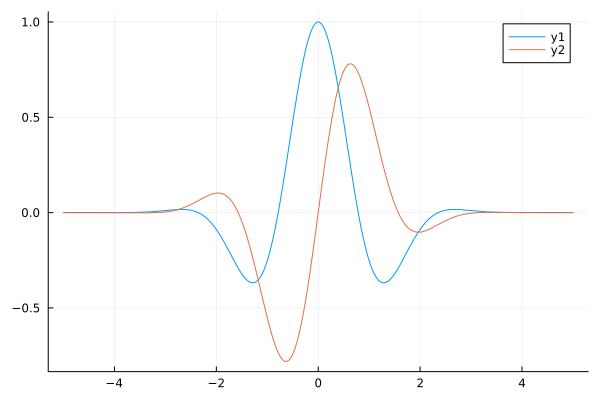

In [188]:
dist = Normal(2, 1)
f(t) = cf(dist, t)
plot(t -> real(f(t)), -5, 5)
plot!(t -> imag(f(t)))

In [189]:
n = 1
x = 1.0
@time @show pdf_nconv(dist, n, x; maxevals1=20000)
@time @show pdf_nconv(dist, n, x; maxevals1=20000)
@time @show pdf_nconv(dist, n, x; maxevals1=20000)
pdf(dist, x)

pdf_nconv(dist, n, x; maxevals1 = 20000) = 0.2419780611116238
  0.392378 seconds (4.46 k allocations: 18.026 MiB, 1.78% gc time)
pdf_nconv(dist, n, x; maxevals1 = 20000) = 0.2419780611116238
  0.393768 seconds (4.58 k allocations: 18.035 MiB, 2.56% gc time)
pdf_nconv(dist, n, x; maxevals1 = 20000) = 0.2419780611116238
  0.400845 seconds (4.58 k allocations: 18.035 MiB, 0.56% gc time)


0.24197072451914337

 19.543762 seconds (266.81 k allocations: 1.776 GiB, 0.93% gc time, 0.36% compilation time)


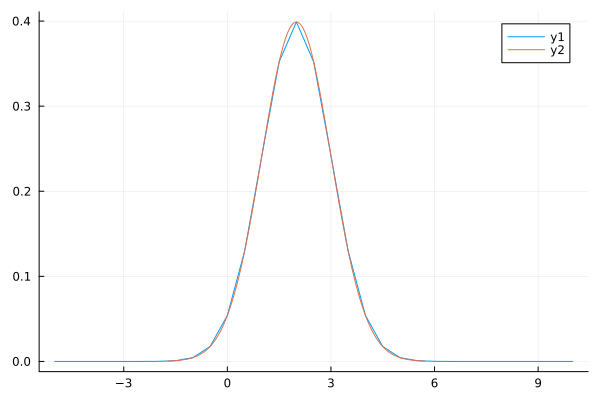

In [191]:
@time plot(range(-5, 10, step=0.5), x -> pdf_nconv(dist, n, x; maxevals1=30000))
plot!(dist)

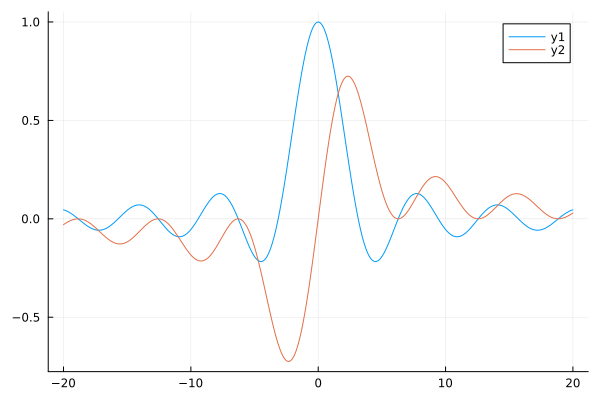

In [158]:
dist = Uniform()
f(t) = cf(dist, t)
plot(t -> real(f(t)), -20, 20)
plot!(t -> imag(f(t)))

In [159]:
dist = Uniform()
n = 5
@time pdf_nconv(dist, n, 1.0)
@time pdf_nconv(dist, n, 1.0)
@time pdf_nconv(dist, n, 1.0)

  0.157716 seconds (558.86 k allocations: 29.359 MiB, 6.20% gc time, 95.37% compilation time)
  0.007247 seconds (1.53 k allocations: 1.206 MiB)
  0.007032 seconds (1.53 k allocations: 1.206 MiB)


0.041666514383604185

  1.366204 seconds (1.05 M allocations: 190.608 MiB, 2.66% gc time, 30.27% compilation time)


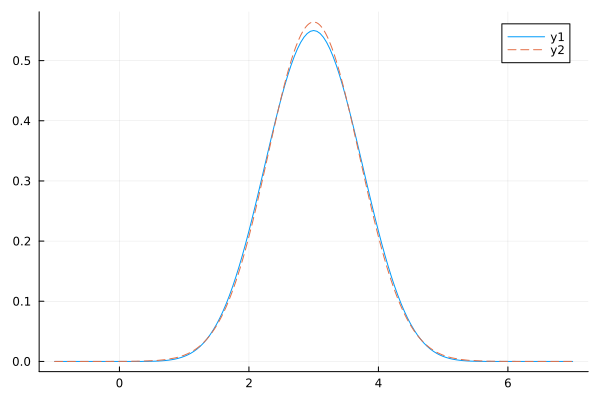

In [160]:
n = 6
@time plot(range(-1, n+1, step=0.05), x -> 0 ≤ x ≤ n ? pdf_nconv(dist, n, x) : 0.0)
plot!(Normal(n*mean(dist), √n*std(dist)), -1, n+1; ls=:dash)

  1.097006 seconds (321.84 k allocations: 154.767 MiB, 2.95% gc time, 7.90% compilation time)


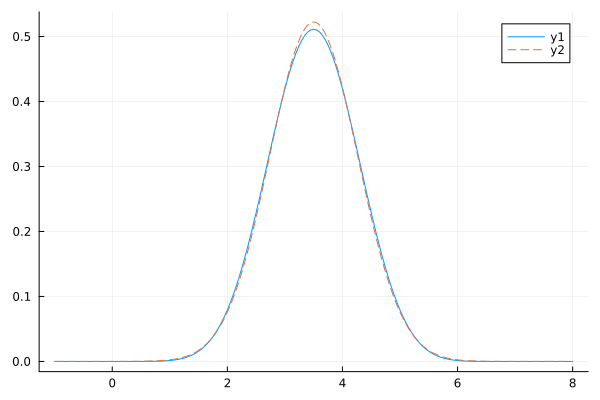

In [92]:
n = 7
@time plot(range(-1, n+1, step=0.05), x -> 0 ≤ x ≤ n ? pdf_nconv(dist, n, x) : 0.0)
plot!(Normal(n*mean(dist), √n*std(dist)), -1, n+1; ls=:dash)

  1.597921 seconds (452.71 k allocations: 223.712 MiB, 2.64% gc time, 5.95% compilation time)


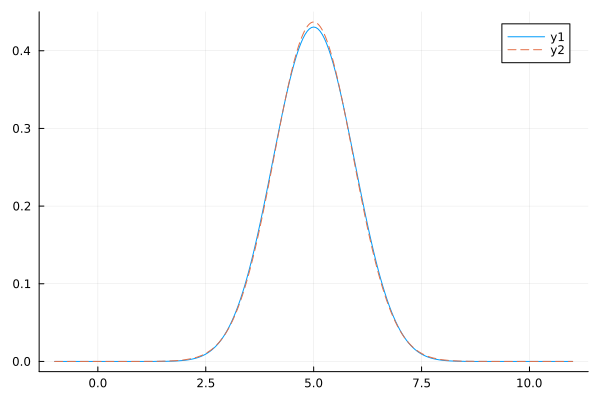

In [93]:
n = 10
@time plot(range(-1, n+1, step=0.05), x -> 0 ≤ x ≤ n ? pdf_nconv(dist, n, x) : 0.0)
plot!(Normal(n*mean(dist), √n*std(dist)), -1, n+1; ls=:dash)